Text(0.5, 1.0, 'KMeans')

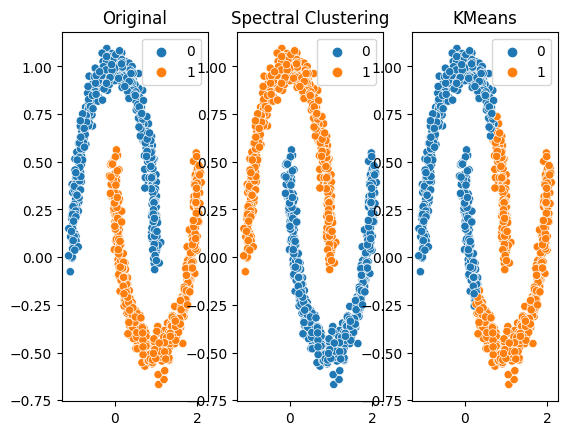

In [2]:
from sklearn.cluster import SpectralClustering, KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X_train, y_train = make_moons(n_samples=1000, noise=0.05, random_state=17)

clustering = SpectralClustering(n_clusters=2,
                                assign_labels='discretize',
                                random_state=17,
                                gamma=100).fit(X=X_train)

kmeans = KMeans(n_clusters=2, random_state=17).fit(X=X_train)

fig, axes = plt.subplots(1,3)

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, ax=axes[0])
axes[0].set_title("Original")
# KMeans randomly select centroid, in this case 2 centroids.
# Each centroids measure the distance to that point. 
# Then, KMeans assign that point to a cluster.
# Then, KMeans calculates the mean of each centroids.
# These mean then are used to re-calcultes the distance to that point again.
# Then, KMeans assign that point to a cluster again.
# If there is no change, then KMeans stop iterating.
# The problem is, it does not care whether a centroid and a point is connected.
# This resulted in this weird cluster.

# While Spectral Clustering only consider a point as part of a cluster if it is connected.
# in this case gamma (if you use RBF), 
# RBF is just polynomial kernel (axb + r)^d with d=infinite and r=0 
# (r is coef0 in sklearn.svm.SVC) see sklearn.metrics.pairwise.polynomial_kernel.
# e^(-γ(a-b)^2)
# γ is gamma.
# a-b is the difference between the two points.
# therefore if the RBF f(x) is low, there is no relationship / the points are not connected
# therefore if the gamma is small, the more sensitive is the RBF to consider a point
# as connected.
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=clustering.labels_, ax=axes[1])
axes[1].set_title("Spectral Clustering")

sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=kmeans.labels_, ax=axes[2])
axes[2].set_title("KMeans")